# Customer Analysis and Best-Selling Product Identification

This script is designed to analyze customer characteristics and identify the best-selling products, enabling businesses to focus on the most profitable market segments. Instead of employing a broad marketing strategy, this approach helps in pinpointing the key customers who contribute the most to revenue generation.

Key Features:
- Determines the best-selling products to optimize marketing strategies.
- Identifies loyal customer characteristics based on historical data.
- Provides insights on  potential customer for targeted marketing and improved business decision-making.

By leveraging this analysis, businesses can refine their market research efforts, ensuring resources are directed toward the most valuable customer segments and products.

### Step 1 : Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2 : Load Datasets

In [2]:
# Load Data
transactions = pd.read_csv("/content/transaction_data.csv")
purchase_behaviour = pd.read_csv("/content/purchase_behaviour.csv")

### Step 3 : Previewing the Transactions Dataset and Purchase Behaviour dataset

In [ ]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
transactions.shape

(264836, 8)

In [4]:
purchase_behaviour.head( )

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
purchase_behaviour.shape

(72637, 3)

### Step 4 : Checking Duplicates values

In [6]:
# Check for duplicates in LYLTY_CARD_NBR
duplicates_1 = transactions['LYLTY_CARD_NBR'].duplicated().sum()
duplicates_2 = purchase_behaviour['LYLTY_CARD_NBR'].duplicated().sum()

print(f"Duplicates in dataset 1: {duplicates_1}")
print(f"Duplicates in dataset 2: {duplicates_2}")


Duplicates in dataset 1: 192199
Duplicates in dataset 2: 0


### Step 5 : Merging Datasets

In [7]:
# Merge datasets on LYLTY_CARD_NBR
data = pd.merge(transactions, purchase_behaviour, on="LYLTY_CARD_NBR")

In [ ]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [8]:
data.shape

(264836, 10)

### Step 6 : Check Null values

In [9]:
# 3. Handle missing values in merged data
print("\nChecking for missing values in merged dataset:")
print(data.isna().sum())



Checking for missing values in merged dataset:
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


### Step 7 : Find Most Profitable Products

In [10]:
# Aggregate sales per product
product_sales = data.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()
top_3_products = product_sales.sort_values(by="TOT_SALES", ascending=False).head(3)

In [11]:
# Print Results
print("Top 3 Most Profitable Products:")
print(top_3_products)

Top 3 Most Profitable Products:
                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


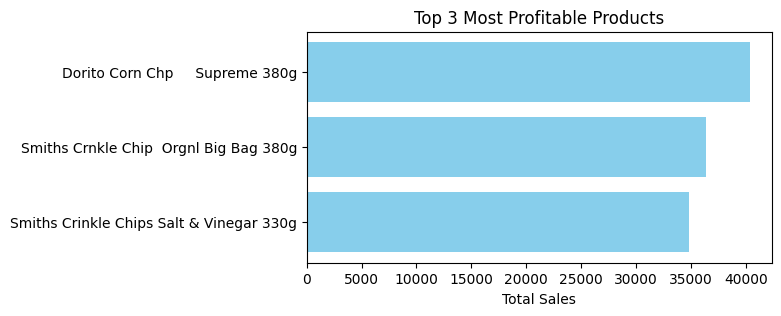

In [13]:
# Visualize the top 3 products
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.barh(top_3_products['PROD_NAME'], top_3_products['TOT_SALES'], color='skyblue')
plt.xlabel('Total Sales')
plt.title('Top 3 Most Profitable Products')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

### Step 8 : Check for unique combinations of customer behavior

In [14]:
# 1. Get all unique combinations of LIFESTAGE, PREMIUM_CUSTOMER, and any other relevant columns
unique_combinations = data[['LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()

# 2. Count the number of unique combinations
num_combinations = unique_combinations.shape[0]

# 3. Print the result
print(f"There are {num_combinations} unique customer behavior combinations.")
unique_combinations

There are 21 unique customer behavior combinations.


,LIFESTAGE,PREMIUM_CUSTOMER
0,YOUNG SINGLES/COUPLES,Premium
1,MIDAGE SINGLES/COUPLES,Budget
5021,MIDAGE SINGLES/COUPLES,Mainstream
16895,MIDAGE SINGLES/COUPLES,Premium
25111,NEW FAMILIES,Budget
28116,NEW FAMILIES,Mainstream
30441,NEW FAMILIES,Premium
32030,OLDER FAMILIES,Budget
55190,OLDER FAMILIES,Mainstream
69434,OLDER FAMILIES,Premium


### Step 9 : Find total sales and customer count for each combination

In [15]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER and aggregate the total sales and count
customer_behavior_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum'),
    customer_count=('LYLTY_CARD_NBR', 'count')
).reset_index()

# Display the result
print(customer_behavior_sales)
customer_behavior_sales.to_csv("customer_behavior_sales.csv", index=False)

                 LIFESTAGE PREMIUM_CUSTOMER  total_sales  customer_count
0   MIDAGE SINGLES/COUPLES           Budget     35514.80            5020
1   MIDAGE SINGLES/COUPLES       Mainstream     90803.85           11874
2   MIDAGE SINGLES/COUPLES          Premium     58432.65            8216
3             NEW FAMILIES           Budget     21928.45            3005
4             NEW FAMILIES       Mainstream     17013.90            2325
5             NEW FAMILIES          Premium     11491.10            1589
6           OLDER FAMILIES           Budget    168363.25           23160
7           OLDER FAMILIES       Mainstream    103445.55           14244
8           OLDER FAMILIES          Premium     81958.40           11192
9    OLDER SINGLES/COUPLES           Budget    136769.80           18407
10   OLDER SINGLES/COUPLES       Mainstream    133393.80           18318
11   OLDER SINGLES/COUPLES          Premium    132263.15           17754
12                RETIREES           Budget    1131

### Step : Find loyal and potential customers

In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average sales per customer
customer_behavior_sales['avg_sales_per_customer'] = customer_behavior_sales['total_sales'] / customer_behavior_sales['customer_count']

# Select features for clustering
X = customer_behavior_sales[['total_sales', 'customer_count', 'avg_sales_per_customer']]

# Normalize the data for better clustering performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_behavior_sales['Cluster'] = kmeans.fit_predict(X_scaled)

# Add the cluster information to the original dataset
customer_behavior_sales['Cluster'] = customer_behavior_sales['Cluster'].astype(str)

# 1. Find Loyal Customers: We can assume loyal customers are in the cluster with the highest total sales and/or average sales per customer
loyal_cluster = customer_behavior_sales.groupby('Cluster').agg({'total_sales': 'sum', 'avg_sales_per_customer': 'mean'}).idxmax()

# 2. Find Potential Customers: Potential customers can be identified as those in clusters with a high number of customers but low sales
# This depends on your business logic, for now we assume clusters with high customer counts and low total sales are potential customers
potential_cluster = customer_behavior_sales.groupby('Cluster').agg({'customer_count': 'sum', 'total_sales': 'sum'}).idxmin()

# Find top 3 loyal and potential customers based on the cluster
loyal_customers = customer_behavior_sales[customer_behavior_sales['Cluster'] == loyal_cluster[0]].nlargest(21,'total_sales')
potential_customers = customer_behavior_sales[customer_behavior_sales['Cluster'] == potential_cluster[0]].nlargest(21,'customer_count')

# Print the results
print("\nTop Loyal Customer characteristics :")
print(loyal_customers[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'total_sales', 'customer_count']])

print("\nTop Potential Customer characteristics :")
print(potential_customers[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'total_sales', 'customer_count']])



Top Loyal Customer characteristics :
                 LIFESTAGE PREMIUM_CUSTOMER  total_sales  customer_count
6           OLDER FAMILIES           Budget    168363.25           23160
19   YOUNG SINGLES/COUPLES       Mainstream    157621.60           20854
13                RETIREES       Mainstream    155677.05           21466
15          YOUNG FAMILIES           Budget    139345.85           19122
9    OLDER SINGLES/COUPLES           Budget    136769.80           18407
10   OLDER SINGLES/COUPLES       Mainstream    133393.80           18318
11   OLDER SINGLES/COUPLES          Premium    132263.15           17754
12                RETIREES           Budget    113147.80           15201
7           OLDER FAMILIES       Mainstream    103445.55           14244
14                RETIREES          Premium     97646.05           13096
16          YOUNG FAMILIES       Mainstream     92788.75           12907
1   MIDAGE SINGLES/COUPLES       Mainstream     90803.85           11874
17          Y

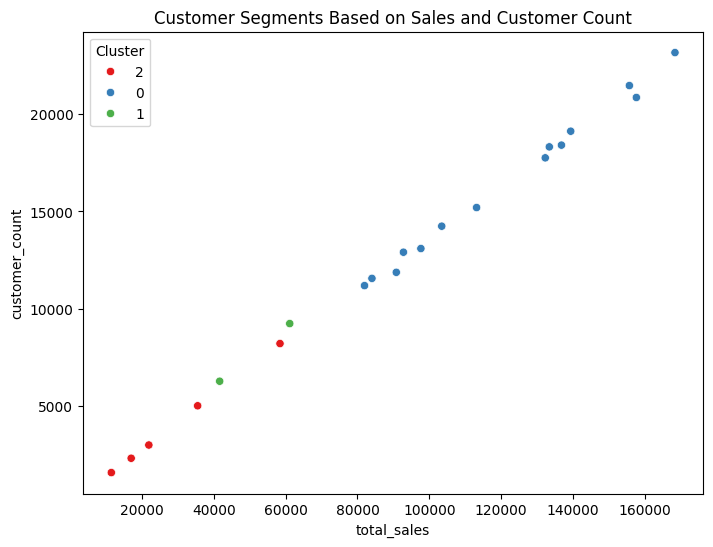

In [17]:
# 3. Visualize the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='customer_count', hue='Cluster', data=customer_behavior_sales, palette='Set1')
plt.title('Customer Segments Based on Sales and Customer Count')
plt.show()



# Conclusion

This analysis successfully identifies high-value customers based on their spending behavior and categorizes them for targeted marketing efforts.The data visualization highlights spending patterns, while segmentation helps in understanding the distribution of customers.<br>

The processed dataset can be further used for predictive modeling and strategic decision-making to enhance customer engagement and retention.